# Image classifier using CNN
- Data contains around 25k images of size 150x150 distributed under 6 categories.
- let's build an image classifier using Convolution Neural Network
- This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.
### Steps
- Importing libraries
- Data processing
- data exploration and visualization
- model building
- model evaluation and prediction

### Importing Libraries

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import the warnings module
import warnings

# Filter specific UserWarnings
warnings.filterwarnings("ignore", message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")
warnings.filterwarnings("ignore", message="unable to load libtensorflow_io_plugins.so")
warnings.filterwarnings("ignore", message="file system plugins are not loaded")

# tensorflow libraries
import tensorflow as tf
from tensorflow.keras import layers, models

### Data processing

In [7]:
# Data loader function
def load_images(folder_path, target_size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path)
            # Resize the image to a common size
            image = cv2.resize(image, target_size)
            # You can apply any other preprocessing to the images here if needed
            # For example, normalization, data augmentation, etc.
            images.append(image)
            labels.append(label)  # Store the original label name as a string
    return np.array(images), np.array(labels)

# Set labels
labels = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [12]:
#creating data path
train_data = 'dataset/seg_train/seg_train'
test_data = 'dataset/seg_test/seg_test'

In [13]:
#Data Split
x_train, y_train = load_images(train_data)
x_test, y_test = load_images(test_data)

# Split the test data into x_val and x_test, and y_val and y_test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [15]:
# Normalize the image data to scale pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

### Data exploration and visualization

In [16]:
x_train.shape

(14034, 150, 150, 3)

In [17]:
x_test.shape

(1500, 150, 150, 3)

In [18]:
x_val.shape

(1500, 150, 150, 3)

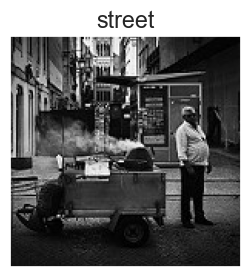

In [19]:
# Plotting function for a random image
def random_image_plot(images, y_train, names):
    index = np.random.randint(images.shape[0])
    plt.figure(figsize=(12, 3))
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    class_label = y_train[index]
    plt.title(class_label)
    plt.show()

#sample image plot
random_image_plot(x_train, y_train, labels)

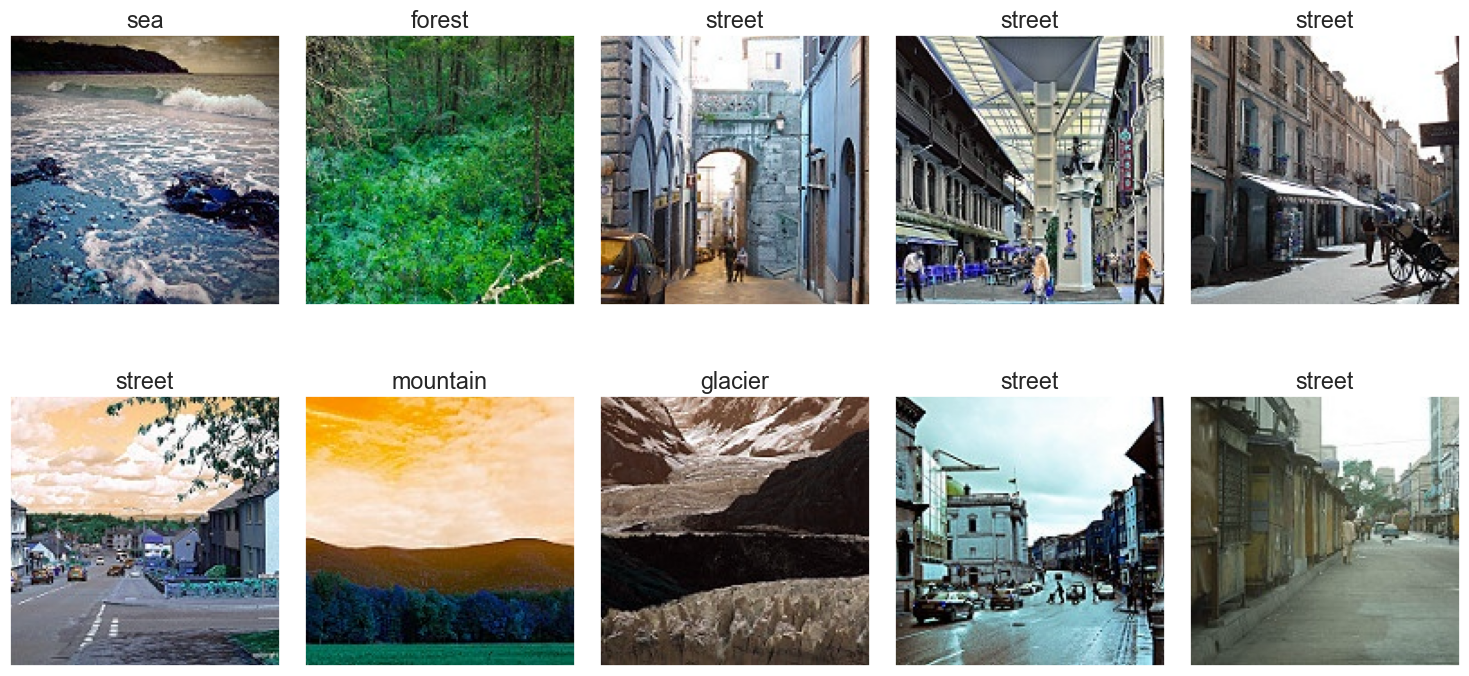

In [20]:
# Plotting function for a grid of random images
def random_images_grid(images, y_train, names, num_images=10):
    plt.figure(figsize=(15, 8))
    rows, cols = 2, 5

    for i in range(num_images):
        index = np.random.randint(images.shape[0])
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[index])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        class_label = y_train[index]
        plt.title(class_label)

    plt.tight_layout()
    plt.show()
    
# plotting a random sample of 10 images
random_images_grid(x_train, y_train, labels, num_images=10)

### Model Building (CNN)

In [21]:
# Convert string labels to integer indices for better training
label_indices = {label: idx for idx, label in enumerate(labels)}
y_train = np.array([label_indices[label] for label in y_train])
y_test = np.array([label_indices[label] for label in y_test])
y_val = np.array([label_indices[label] for label in y_val])

In [22]:
# Model set up
model = models.Sequential([
    #cnn layers
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    #hidden layers
    layers.Flatten(),
    layers.Dropout(0.5),  # Add a dropout layer with 50% dropout rate
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add a dropout layer with 50% dropout rate
    
    #output layer
    layers.Dense(6, activation='softmax') 
])

# Model preparation
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

In [24]:
# Model training
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(x_val, y_val))

Epoch 1/20
439/439 [==============================] - 54s 123ms/step - loss: 1.0515 - accuracy: 0.6035 - val_loss: 0.8026 - val_accuracy: 0.7120
Epoch 2/20
439/439 [==============================] - 51s 116ms/step - loss: 0.7127 - accuracy: 0.7480 - val_loss: 0.7328 - val_accuracy: 0.7467
Epoch 3/20
439/439 [==============================] - 50s 115ms/step - loss: 0.5400 - accuracy: 0.8063 - val_loss: 0.5970 - val_accuracy: 0.8033
Epoch 4/20
439/439 [==============================] - 51s 116ms/step - loss: 0.4447 - accuracy: 0.8413 - val_loss: 0.5564 - val_accuracy: 0.8133
Epoch 5/20
439/439 [==============================] - 53s 120ms/step - loss: 0.3522 - accuracy: 0.8749 - val_loss: 0.6257 - val_accuracy: 0.8013
Epoch 6/20
439/439 [==============================] - 57s 130ms/step - loss: 0.2730 - accuracy: 0.9037 - val_loss: 0.6149 - val_accuracy: 0.8280
Epoch 7/20
439/439 [==============================] - 56s 127ms/step - loss: 0.2335 - accuracy: 0.9174 - val_loss: 0.6549 - val_ac

### Model evaluation and prediction

##### Model performance plots

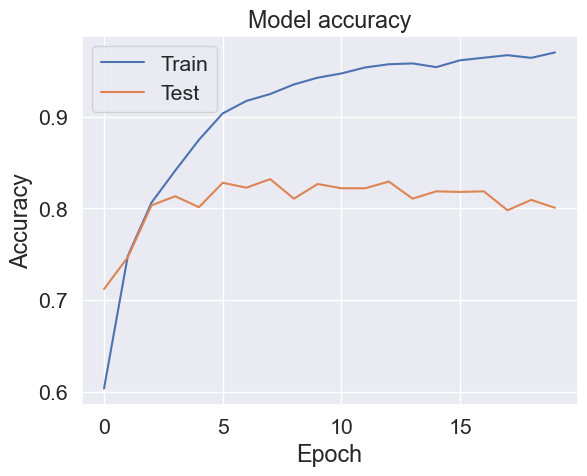

In [39]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

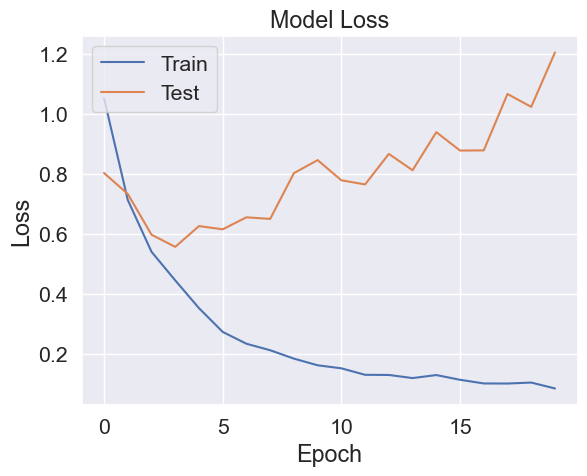

In [40]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
#evaluate the model using on validation data
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

47/47 [==============================] - 1s 29ms/step - loss: 1.2044 - accuracy: 0.8007
Validation Loss: 1.2043583393096924, Validation Accuracy: 0.8006666898727417


### Model prediction

In [46]:
# Make predictions using the model on the test data
predictions = model.predict(x_test)

47/47 [==============================] - 1s 28ms/step


In [68]:
#evaluate predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert the predicted probabilities to class labels (assuming one-hot encoded probabilities)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')
cm = confusion_matrix(y_test, predicted_labels)

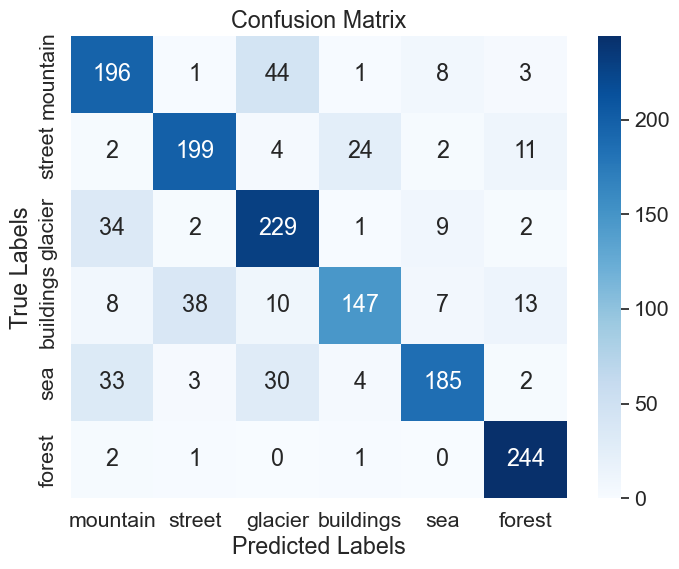

In [69]:
import seaborn as sns
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

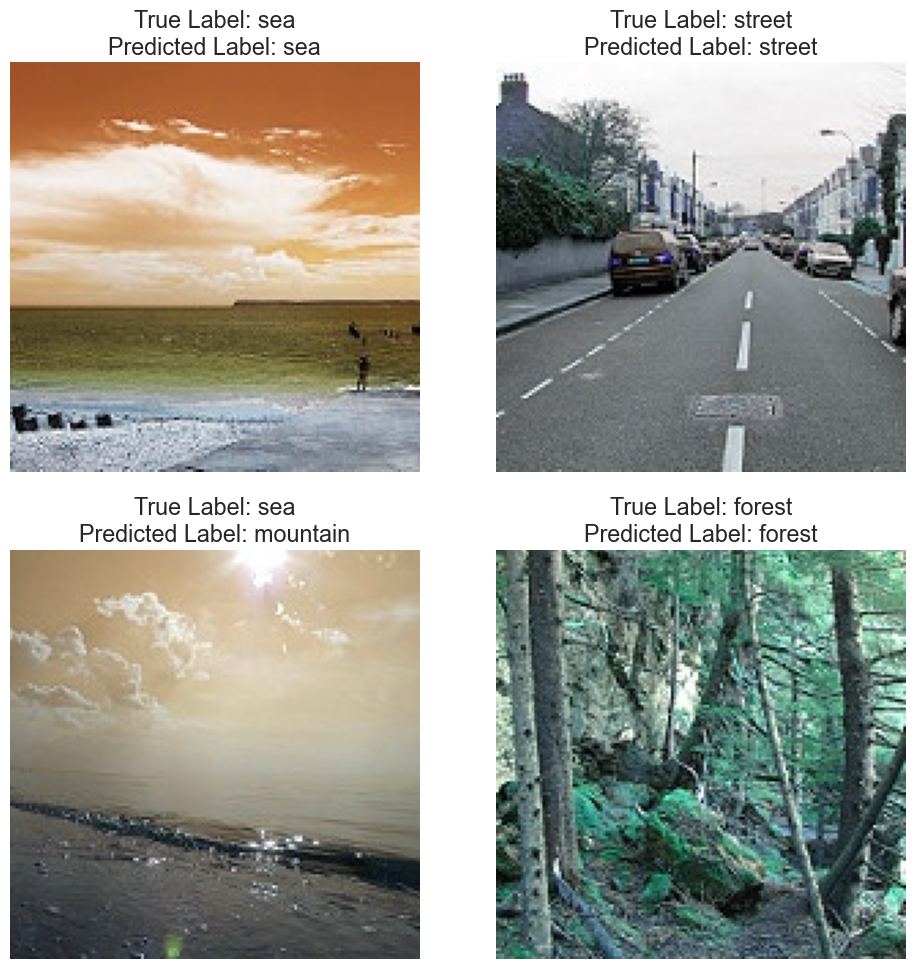

In [70]:
# Choose four random indices from the test data
random_indices = np.random.randint(0, len(x_test), size=4)

# Create a 2x2 grid to display the images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    image = x_test[idx]
    true_label = y_test[idx]
    predicted_label = np.argmax(predictions[idx])
    true_class = labels[true_label]
    predicted_class = labels[predicted_label]

    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.title(f"True Label: {true_class}\nPredicted Label: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

This is the end of the project...
Fine-Tuning the model to improve performance